## exercise 1

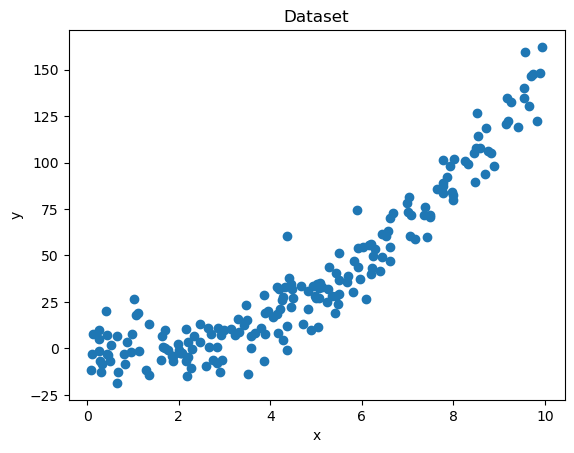

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

def power_fitting(x,ඞ):
    outp=pd.DataFrame(x)
    for p in range(2,ඞ+1):
        outp=pd.concat([outp,pd.DataFrame(x**p)],axis=1)
    return outp

np.random.seed(2)

#generate the data
x=np.random.uniform(0,10,200)
y=2*x**2-5*x+3+np.random.normal(0,10,200)

#plot the data
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset')
plt.show()

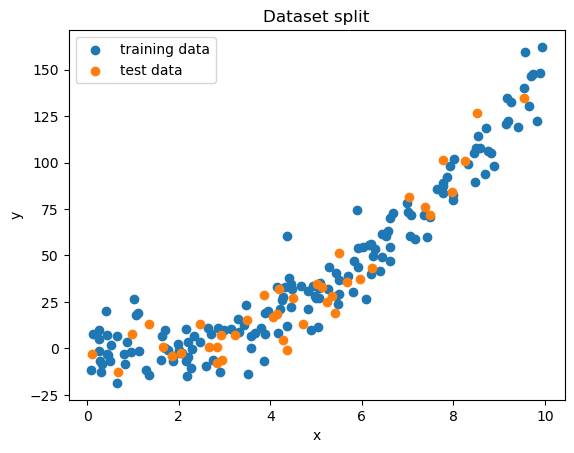

In [5]:
#split the data for training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y, train_size=0.8,random_state=2)
#plot split data
plt.scatter(xtrain,ytrain,label='training data')
plt.scatter(xtest,ytest,label='test data')
plt.xlabel('x'); plt.ylabel('y'); plt.title('Dataset split'); plt.legend()
plt.show()

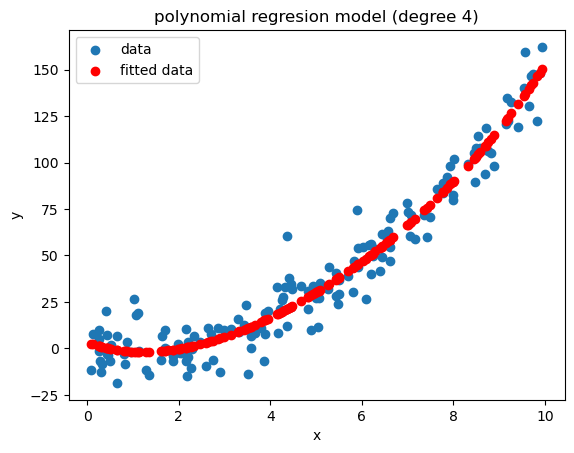

In [190]:
#fit the regresion model
#train_x_p1=pd.DataFrame(xtrain)
#train_x_p2=pd.DataFrame(xtrain**2)

#create polynomial features
train_x_poly=power_fitting(xtrain,4)

#fit the ols model
X=sm.add_constant(train_x_poly)
model=sm.OLS(ytrain,X)
result=model.fit()

#obtain predicted values
predict_train_y=result.predict()

#plot
plt.scatter(xtrain,ytrain,label='data'); plt.scatter(xtrain,predict_train_y,color='red',label='fitted data')
plt.xlabel('x'); plt.ylabel('y'); plt.title('polynomial regresion model (degree 4)'); plt.legend()
plt.show()


In [86]:
#repeat steps for test data
#fit the regresion model
#test_x_p1=pd.DataFrame(xtest)
#test_x_p2=pd.DataFrame(xtest**2)

#create polynomial features
test_x_poly=power_fitting(xtest,4)

#fit the ols model
X=sm.add_constant(test_x_poly)
model=sm.OLS(ytest,X)
result=model.fit()

#obtain predicted values
predict_test_y=result.predict()

#fit the model on the training data
r_squared_test=result.rsquared
r_squared_test_adj=result.rsquared_adj
r_squared_score=r2_score(ytest,predict_test_y)
mse=root_mean_squared_error(ytest,predict_test_y)**2
print(r_squared_test_adj,r_squared_score,mse)
print('the r2adj is highest with a fourth power polynomial so were fitting with that.')

0.9291283918588195 0.9363972747450944 88.40500595084863
the r2adj is highest with a fourth power polynomial so were fitting with that.


## exercise 2

In [59]:
df=pd.read_csv('winequality-red.csv',sep=';')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [60]:
#functions
def make_ols_string(x_names,y_name):
    s=f'{y_name} ~ '
    for x_name in x_names:
        s+=f'{x_name} + '
    s=s[:-3]
    return s
def power_fitting(x,ඞ):
    outp=pd.DataFrame(x)
    for p in range(2,ඞ+1):
        outp=pd.concat([outp,pd.DataFrame(x**p)],axis=1)
    return outp
def scatter_plotter(x,y,x_names):
    for x_name in x_names:
        plt.scatter(x[x_name],y)
        plt.xlabel(x_name); plt.ylabel('quality'); plt.title(f'corelation between {x_name} and quality')
        plt.show()
def train_data(xtrain,ytrain,x_names,degree):
    #create polynomial features
    for x_name in x_names:
        train_x_poly=power_fitting(xtrain[x_name],degree)

        #fit the ols model
        X=sm.add_constant(train_x_poly)
        model=sm.OLS(ytrain,X)
        result=model.fit()

        #obtain predicted values
        predict_train_y=result.predict()
        #fit the model on the training data
        r_squared_train=result.rsquared
        r_squared_train_adj=result.rsquared_adj
        r_squared_score=r2_score(ytrain,predict_train_y)
        mse=root_mean_squared_error(ytrain,predict_train_y)**2
        print(f'r2adj={r_squared_train_adj} r2={r_squared_score} mse={mse}')

        #plot
        plt.scatter(xtrain[x_name],ytrain,label='data'); plt.scatter(xtrain[x_name],predict_train_y,color='red',label='fitted data')
        plt.xlabel(x_name); plt.ylabel('quality'); plt.title(f'polynomial regresion model of {x_name} and wine quality (degree {degree})'); plt.legend()
        plt.show()
def test_data(xtest,ytest,x_names,degree):
    for x_name in x_names:
    #create polynomial features
        test_x_poly=power_fitting(xtest[x_name],degree)

        #fit the ols model
        X=sm.add_constant(test_x_poly)
        model=sm.OLS(ytest,X)
        result=model.fit()

        #obtain predicted values
        predict_test_y=result.predict()

        #fit the model on the training data
        r_squared_test=result.rsquared
        r_squared_test_adj=result.rsquared_adj
        r_squared_score=r2_score(ytest,predict_test_y)
        mse=root_mean_squared_error(ytest,predict_test_y)**2
        print(f'{x_name} at degree {degree}:')
        print(f'r2adj={r_squared_test_adj} r2={r_squared_score} mse={mse}')
        print(f'the r2adj is highest with a power {degree} polynomial so were fitting with that.')
        print('')

#### after having turned all data into boxplots it was concludes that no data was missing, all data was numerical and that no outliers were an error. happy days.

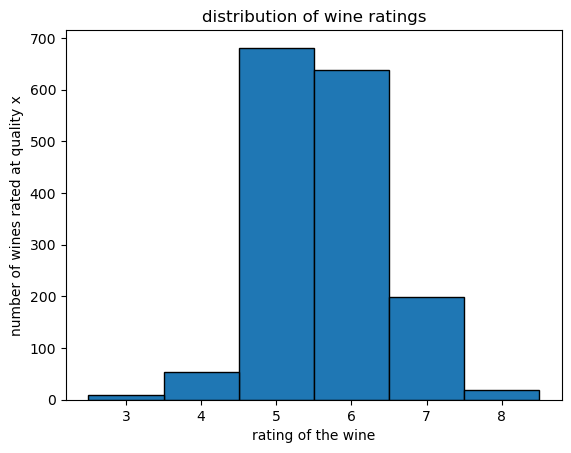

In [8]:
#visualize the quality
plt.bar(df.quality.unique(),df.quality.value_counts(),edgecolor='black',width=1) #histograms are dead and bar plots have killed them
plt.xlabel('rating of the wine'); plt.ylabel('number of wines rated at quality x'); plt.title('distribution of wine ratings')
plt.show()

In [9]:
#split the data into train and test data with quality as the y. a train size of 0.95 is being used, there is no reason why spicificly 0.95
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('quality',axis=1),df['quality'], train_size=0.8,random_state=2)

In [12]:
#scatter_plotter(xtrain,ytrain,df.drop('quality',axis=1).columns)

r2adj=0.026205007468072194 r2=0.03001484703196855 mse=0.6424250244181656


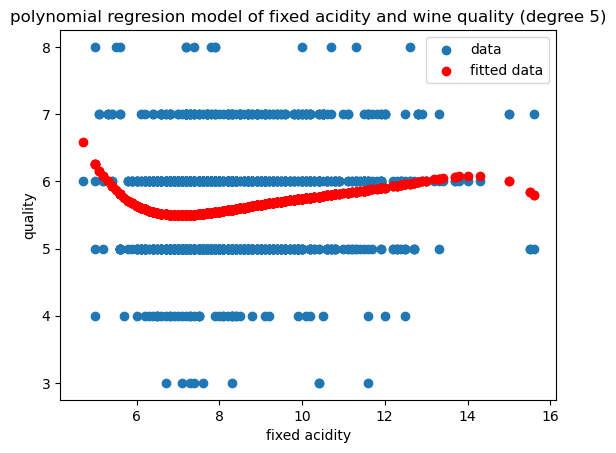

r2adj=0.16245046789540663 r2=0.16572726575184105 mse=0.5525421497749949


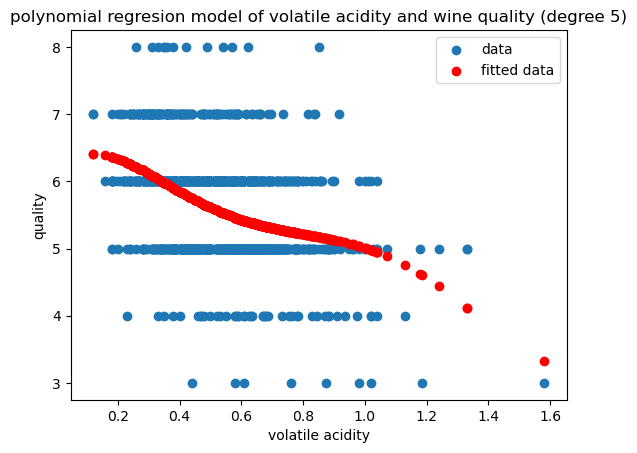

r2adj=0.05504139207070591 r2=0.05873841322848883 mse=0.6234012922932838


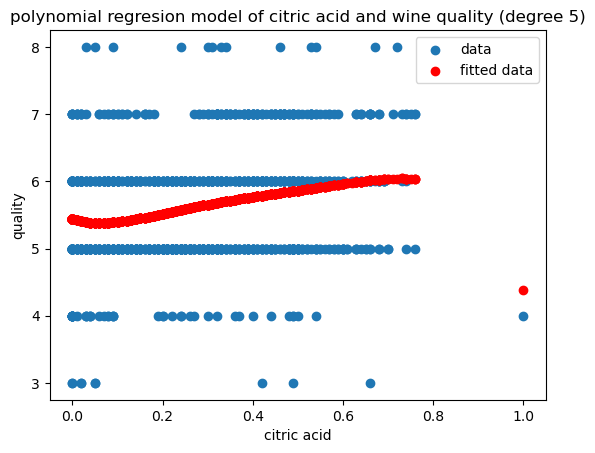

r2adj=-0.001569180529602754 r2=0.0023493217416395984 mse=0.660748011843074


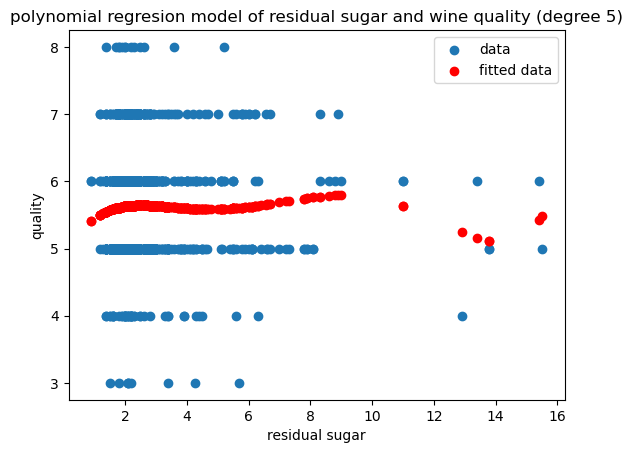

r2adj=0.038637876607106825 r2=0.0423990742729633 mse=0.6342229014646834


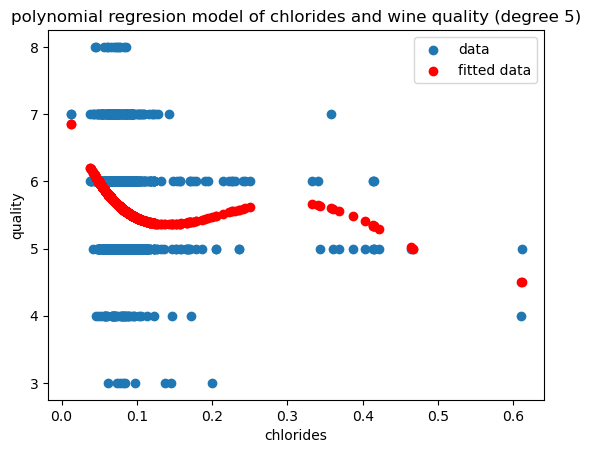

r2adj=-0.0015070455697994145 r2=0.002411213606921092 mse=0.6607070206145556


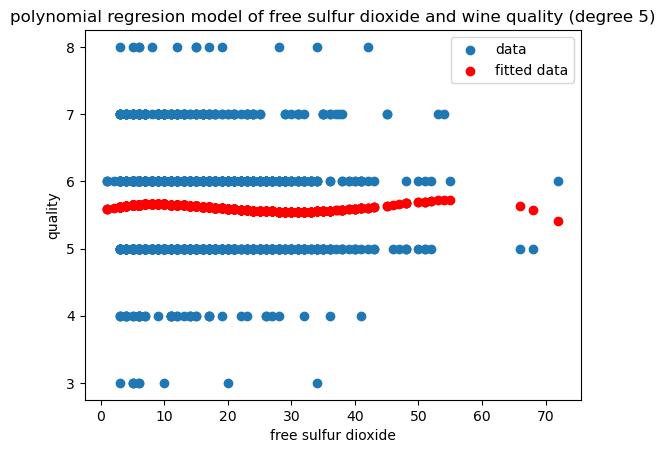

r2adj=0.04199333942391037 r2=0.04574140930096848 mse=0.6320092596832502


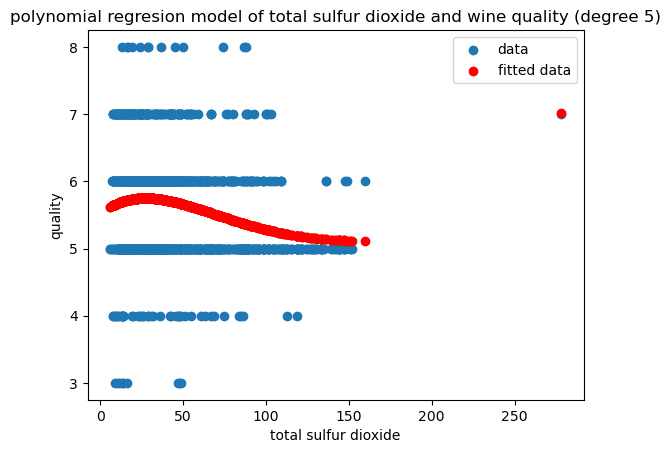

r2adj=0.06668251471661935 r2=0.07033399157610054 mse=0.6157214946383265


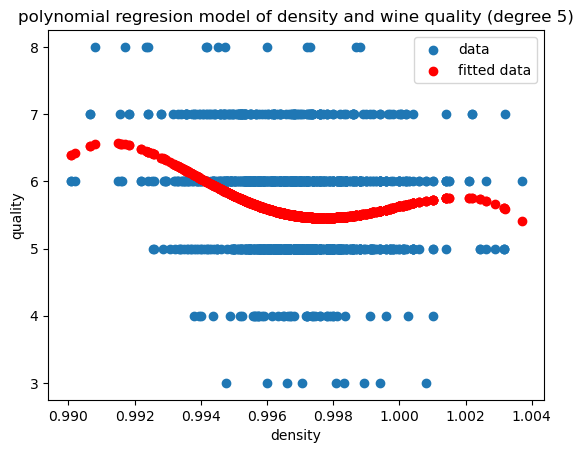

r2adj=0.0001442370131076176 r2=0.0040560357728371965 mse=0.6596176483526516


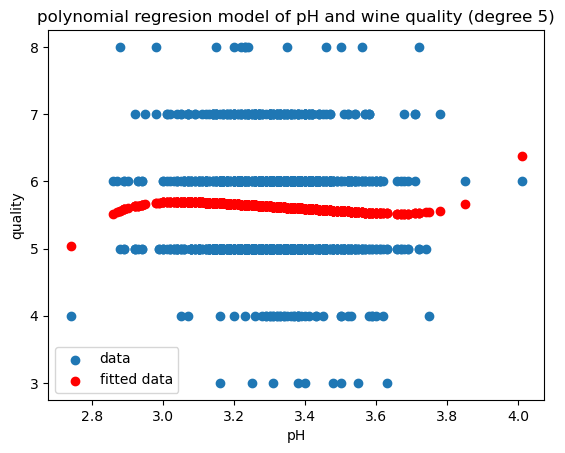

r2adj=0.18247746287734723 r2=0.18567590785826515 mse=0.539330084772644


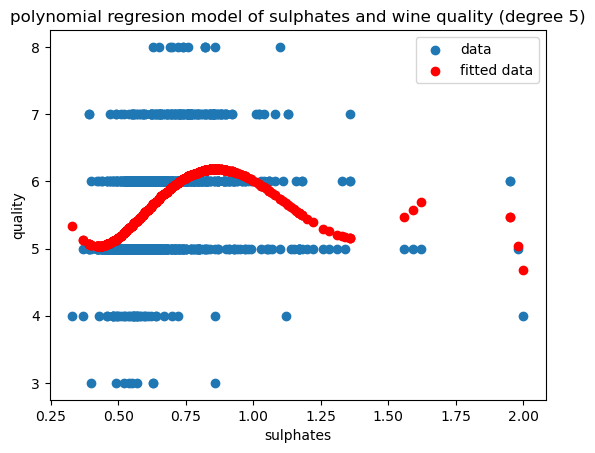

r2adj=0.23724095856604277 r2=0.2402251488689926 mse=0.5032019055102303


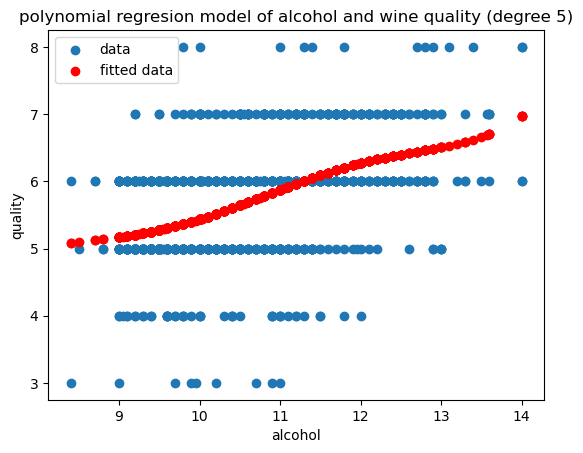

In [61]:
train_data(xtrain,ytrain,df.drop('quality',axis=1).columns,5)

In [65]:
test_data(xtest,ytest,['volatile acidity','citric acid','alcohol','sulphates'],5)

volatile acidity at degree 5:
r2adj=0.12761730743528932 r2=0.14129101735009675 mse=0.5195105486732827
the r2adj is highest with a power 5 polynomial so were fitting with that.

citric acid at degree 5:
r2adj=0.09641526356789332 r2=0.11057803373140607 mse=0.5380916038311101
the r2adj is highest with a power 5 polynomial so were fitting with that.

alcohol at degree 5:
r2adj=0.210662077576669 r2=0.2230341453262511 mse=0.4700567545204436
the r2adj is highest with a power 5 polynomial so were fitting with that.

sulphates at degree 5:
r2adj=0.10065748989861356 r2=0.11475376748640964 mse=0.5355653256879828
the r2adj is highest with a power 5 polynomial so were fitting with that.



### volatile acidity, citric acid, alcohol and sulphates seem to have the strongest corelation the wine quality acording to this model

## exercise 3